In [1]:
import pandas_datareader as pdr
import datetime
import pandas as pd

start = datetime.datetime(2017,1,1)
end = datetime.datetime(2024,7,20)
print(start)
print(end)

2017-01-01 00:00:00
2024-07-20 00:00:00


In [2]:
stock = ['IBM']
data = pdr.DataReader(stock,'stooq',str(start.date()),str(end.date())).stack('Symbols')
data.head()

,Attributes,Close,High,Low,Open,Volume
Date,Symbols,,,,,
2024-07-19,IBM,183.25,187.00,181.95,186.33,3816039.0
2024-07-18,IBM,185.22,189.47,185.10,186.64,3487808.0
2024-07-17,IBM,187.45,187.94,185.07,185.44,4225302.0
2024-07-16,IBM,185.81,186.60,184.52,184.67,3374526.0
2024-07-15,IBM,182.88,184.90,182.60,183.38,2925794.0


In [3]:
newData = data.reset_index()
newData.head()

Attributes,Date,Symbols,Close,High,Low,Open,Volume
0,2024-07-19,IBM,183.25,187.00,181.95,186.33,3816039.0
1,2024-07-18,IBM,185.22,189.47,185.10,186.64,3487808.0
2,2024-07-17,IBM,187.45,187.94,185.07,185.44,4225302.0
3,2024-07-16,IBM,185.81,186.60,184.52,184.67,3374526.0
4,2024-07-15,IBM,182.88,184.90,182.60,183.38,2925794.0


In [4]:
newData.to_csv('IBM_stock_2017_to_2024.csv')

,Unnamed: 0,Symbols,Close,High,Low,Open,Volume
Date,,,,,,,
2017-01-03,1897,IBM,126.675,127.163,125.758,126.509,3.873468e+06
2017-01-04,1896,IBM,128.198,128.675,126.763,127.085,4.457673e+06
2017-01-05,1895,IBM,127.797,128.304,126.694,128.188,3.540881e+06
2017-01-06,1894,IBM,128.422,128.724,126.879,127.787,3.888454e+06
2017-01-09,1893,IBM,126.987,128.636,126.967,128.363,4.210509e+06


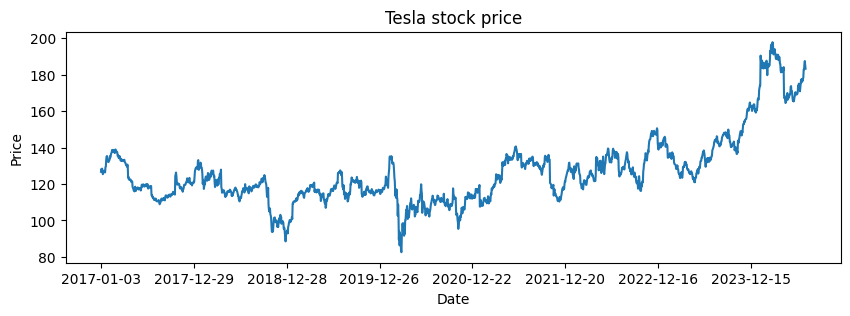

In [8]:
import matplotlib.pyplot as plt
# plot the close price fo the tesla stock
# load the csv file
IBM_data = pd.read_csv('/content/IBM_stock_2017_to_2024.csv')

# set the date as the index
IBM_data.set_index('Date',inplace=True)
# sort the data into ascending order wrt dates
IBM_data.sort_index(ascending=True,inplace=True)


# and then sperate the close price
close_price = IBM_data['Close']
# then plot the close price
close_price.plot(xlabel='Date',ylabel='Price',label='Tsla',title=
                'Tesla stock price',figsize=(10,3))

IBM_data.head()


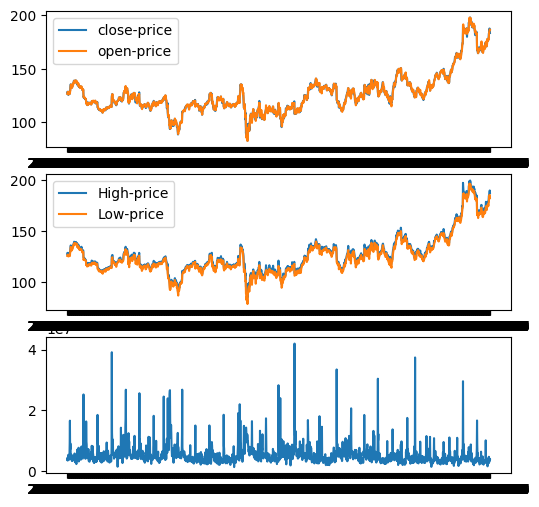

In [10]:
plt.figure(2,(6,6))
plt.subplot(3,1,1)
plt.plot(IBM_data['Close'],label='close-price')
plt.plot(IBM_data['Open'],label='open-price')
plt.legend()

plt.subplot(3,1,2)
plt.plot(IBM_data['High'],label='High-price')
plt.plot(IBM_data['Low'],label='Low-price')
plt.legend()
plt.subplot(3,1,3)
plt.plot(IBM_data['Volume'],label='Volumne')



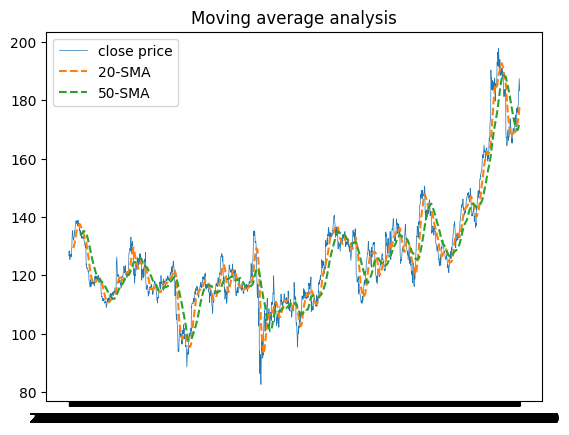

In [11]:
# calulate the moving average
IBM_data['SMA_20'] = IBM_data['Close'].rolling(20).mean()
IBM_data['SMA_50'] = IBM_data['Close'].rolling(50).mean()
plt.figure(1)
plt.plot(IBM_data['Close'],label='close price',linewidth=0.5)
plt.plot(IBM_data['SMA_20'],label='20-SMA',linestyle='--')
plt.plot(IBM_data['SMA_50'],label='50-SMA',linestyle='--')

plt.title('Moving average analysis')
plt.legend()




  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29411 sha256=0927c564374c1228eab0e51811a0374ece6637048a8e99e1a1eb6da25b1ff30d
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


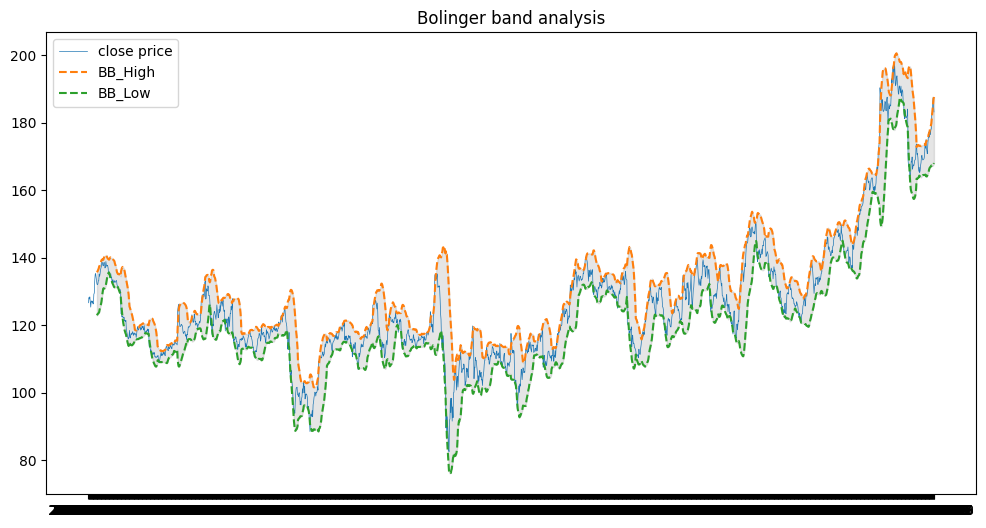

In [13]:
!pip install ta
import ta
# bollinger band
bb = ta.volatility.BollingerBands(IBM_data['Close'],window=20,window_dev=2)

IBM_data['BB_High']=bb.bollinger_hband()
IBM_data['BB_Low']=bb.bollinger_lband()
plt.figure(1,(12,6))
plt.plot(IBM_data['Close'],label='close price',linewidth=0.5)
plt.plot(IBM_data['BB_High'],label='BB_High',linestyle='--')
plt.plot(IBM_data['BB_Low'],label='BB_Low',linestyle='--')
plt.fill_between(IBM_data.index,IBM_data['BB_High'],
                 IBM_data['BB_Low'],color = 'gray',alpha=0.2)
plt.title('Bolinger band analysis')
plt.legend()



,Unnamed: 0,Symbols,Close,High,Low,Open,Volume,SMA_20,SMA_50,BB_High,BB_Low,RSI
Date,,,,,,,,,,,,
2024-07-15,4,IBM,182.88,184.90,182.60,183.38,2925794.0,174.9525,171.0654,182.523362,167.381638,70.989487
2024-07-16,3,IBM,185.81,186.60,184.52,184.67,3374526.0,175.7825,171.4878,184.240878,167.324122,74.873953
2024-07-17,2,IBM,187.45,187.94,185.07,185.44,4225302.0,176.6800,171.9226,186.042386,167.317614,76.750464
2024-07-18,1,IBM,185.22,189.47,185.10,186.64,3487808.0,177.4135,172.2548,187.034993,167.792007,69.184230
2024-07-19,0,IBM,183.25,187.00,181.95,186.33,3816039.0,177.8800,172.5522,187.681769,168.078231,63.251987


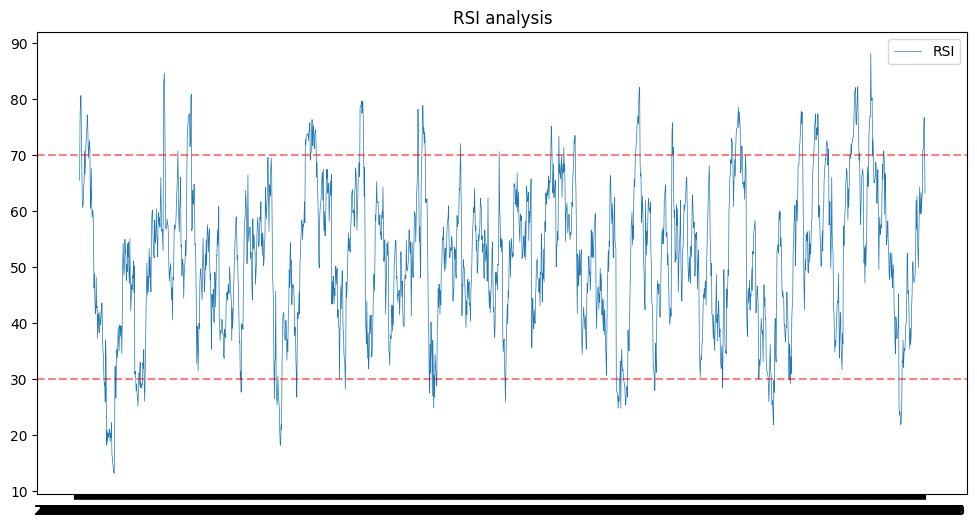

In [14]:
# relative strength index
IBM_data['RSI'] = ta.momentum.rsi(IBM_data['Close'],window=14)

plt.figure(1,(12,6))
plt.plot(IBM_data['RSI'],label='RSI',linewidth=0.5)
plt.axhline(70,linestyle='--',color='red',alpha=0.5)
plt.axhline(30,linestyle='--',color='red',alpha=0.5)
plt.title('RSI analysis')
plt.legend()
IBM_data.tail()